In [1]:
using Pkg; Pkg.activate("."); Pkg.instantiate()

Activating environment at `~/Documents/study-validated-numerics/notebook/Project.toml`


# Chapter 1. Computer Arithmetic

## 1.1 Positional Systems
$\beta \in \mathbb{Z}, \beta \ge 2$ : Integer base

For $\sigma \in \{-1, 1\}$, $b_i \in \{ 0, 1, \ldots, \beta-1\}$,

\begin{align*}
(-1)^\sigma (b_n b_{n-1} \cdots b_0 . b_{-1} b_{-2} \cdots)_\beta
&:= (-1)^\sigma \sum_{i=-\infty}^n b_i \beta^i  \\
&= (-1)^\sigma (b_n \beta^n + b_{n-1} \beta^{n-1} + \cdots + b_0 + b_{-1} \beta^{-1} + b_{-2} \beta^{-2} + \cdots)
\end{align*}

Condition (a) $0 \le b_i \le \beta - 1$ for all $i$.

Condition (b) $0 \le b_i \le \beta - 2$ for infinitely many $i$.

**Prop**. For all nonzero $x \in \mathbb{R}$ has a unique representation above.

**Proof**. (Uniqueness) Let $x = (-1)^\sigma \sum_{i=-\infty}^n b_i \beta^i = (-1)^{\sigma^\prime} \sum_{i=-\infty}^{n^\prime} b^\prime_i \beta^i$.
We can assume $\sigma = \sigma^\prime = 1$ and $n \ge n^\prime$. Set $b_i = 0$ for $b_i^\prime = 0$ for $n < i \le n^\prime$.
By (b) we have $|b_n - b^\prime_n|\beta^n =  |b_n \beta^n - b^\prime_n\beta^n| \le \sum_{i=-\infty}^{n-1}|b_i^\prime - b_i|\beta^i <
\sum_{i=-\infty}^{n-1}(\beta-1)\beta^i = (\beta - 1)\beta^{n-1}\frac{1}{1-1/\beta} = \beta^n$.
Since $b_n, b_n^\prime \in \mathbb{Z}$ and $|b_n - b_n^\prime| < 1 $, we get $b_n = b_n^\prime$.
It is clear that $x - b_n$ also satisfies the conditions (a) and (b), we conclude $b_{n-1} = b_{n-1}^\prime$.
By continuing this process, we see $b_i = b_i^\prime$ for all $i$.

(Existance) Without loss of generality, we can assume $x > 0$.
By dividing $x$ by some $\beta^i$, it suffices to show when $0 < x \le 1$.
The existance is trivial if $x = 1$. We recursively construct for all $n > 0$,
an expression $x_n^\prime = \Sigma_{i=1}^n b_{-i}\beta^{-i}$ such that $0 \le x - x_n^\prime < \beta^{-n}$.
Let $b_{-1}$ be the integer $i \in [0, \beta - 1]$ such that $x \in [i \beta^{-1}, (i+1) \beta^{-1})$.
It is clear that $0 \le x - x_1^\prime < \beta^{-1}$.
Reaplacing $x$ by $(x - x_1^\prime)/\beta$ and follow the same procesure, we can find $b_{-2}$.
Continuing this process, we obtain a sequence $b_{-i}$.
If this sequance violates the condition (b), there exists $m$ such that $b_{-i} = \beta - 1$ for all $i > m$.
By constuction, $x - x_{m-1}^\prime < \beta^{-m}$ but $x - x_{m-1}^\prime = \Sigma_{i=m}^{\infty} (\beta-1)\beta^{-i} = \beta^{-m}$, it leads a contradiction.

## 1.2 Floating Point Numbers
\begin{align*}
\mathbb{R} \supset &\mathbb{F}_\beta = \{ (-1)^\sigma m \times \beta^e \mid m = (b_0 . b_{-1} b_{-2} \cdots)_\beta, m \text{ satisfies (a) and (b)} \} \\
\supset &\mathbb{F}_{\beta, p} = \{ x \in \mathbb{F}_\beta \mid m = (b_0 . b_{-1} b_{-2} \cdots b_{p-1})_\beta \} \\
\supset &\mathbb{F}_{\beta, p}^{\check{e}, \hat{e}} = \{ x \in \mathbb{F}_{\beta, p} \mid \check{e} \le e \le \hat{e} \}
\end{align*}
$m$ : *mantiss*a of $x$, $e$ : *exponent* of $x$, $p$ : *precision*

$\mathbb{F}_\beta$ : *floating point numbers*

$\mathbb{F}_{\beta, p}^{\check{e}, \hat{e}} $ : *computer representable floating point numbers*

**Def**. We say a floating point number $x = (-1)^\sigma (b_0 . b_{-1} b_{-2} \cdots)_\beta \times \beta^e$ is *normalized* if the leading digit $b_0$ is non-zero.

Let's show the *largest positive normal number* $N_{\max}^n$ and
the *smallest positive normal number* $N_{\min}^n$.
The (union of) range $\{ x \in \mathbb{R} \mid N_{min}^n \le |x| \le N_{max}^n \}$ is said to be the *normalized range*.

In [2]:
# Normalized range
const FloatTypes = (Float16, Float32, Float64)

for T in FloatTypes
    println("Normalized range of $(T) is ", floatmin(T), " <= |x| <= ", floatmax(T))
end

Normalized range of Float16 is 6.104e-5 <= |x| <= 6.55e4
Normalized range of Float32 is 1.1754944e-38 <= |x| <= 3.4028235e38
Normalized range of Float64 is 2.2250738585072014e-308 <= |x| <= 1.7976931348623157e308


### 1.2.1 Subnormal numbers
**Def**. $x \in \mathbb{F}_{\beta, p}^{\check{e}, \hat{e}}$ is said to be *subnormal* if $b_0 = 0$ and $e = \check{e}$.

Let's find the *largest positive subnormal number* $N_{\max}^s$ and
the *smallest positive subnormal nubmer* $N_{\min}^s$.

In [3]:
for T in FloatTypes
    println("$(T), N_min^s = ", nextfloat(zero(T)), ", N_max^s = ", prevfloat(floatmin(T)))
end

Float16, N_min^s = 6.0e-8, N_max^s = 6.1e-5
Float32, N_min^s = 1.0e-45, N_max^s = 1.1754942e-38
Float64, N_min^s = 5.0e-324, N_max^s = 2.225073858507201e-308


## 1.3. Rounding
Let $\mathbb{R}^* = \mathbb{R} \cup \{ -\infty, +\infty \}, \mathbb{F}^* = \mathbb{F} \cup \{ -\infty, \infty \}$.

**Def**. A *rounding* is a mapping $\bigcirc : \mathbb{R}^* \rightarrow \mathbb{F}^*$ satisfying the conditions (R1) and (R2):

(R1) $x \in \mathbb{F}^* \Rightarrow \bigcirc (x) = x$.

(R2, *Maximum quality*) $x, y \in \mathbb{R}^*, x \le y \Rightarrow \bigcirc (x) \le \bigcirc (y)$

**Def**. Let $\bigcirc$ be a rounding.

(R3) $\bigcirc$ is *odd* if $\bigcirc (-x) = - \bigcirc (x)$ for all $x \in \mathbb{R}^*$.

(R4a) $\bigcirc$ is *round toward minus infinity* if $\bigcirc (x) \le x$ for all $x \in \mathbb{R}^*$.

(R4a) $\bigcirc$ is *round toward plus infinity* if $\bigcirc (x) \ge x$ for all $x \in \mathbb{R}^*$.

**Example**.
*Rounded down:* $\triangledown (x) = \max \{y \in \mathbb{F}^* \mid y \le x\}$,

*Rounded up:* $\triangle (x) = \min \{y \in \mathbb{F}^* \mid y \ge x\}$.

If $x \in \mathbb{F}^*$, then $\triangledown (x) = x = \triangle (x)$, on the contrary
if $x \notin \mathbb{F}^*$,  we have $\triangledown (x) = x = \triangle (x)$

$\triangledown$ and $\triangle$ give the lower bound and upper bound of roundings: if $\bigcirc$ is a rounding,
$\triangledown (x) \le \bigcirc (x) \le \triangle (x)$ for all $x$.

Julia can create a float from a given `x` with a explicit rounding mode.
See [`Core.Float32`](https://docs.julialang.org/en/v1/base/numbers/#Core.Float32-Tuple{Any}),
[`Core.Float64`](https://docs.julialang.org/en/v1/base/numbers/#Core.Float64-Tuple{Any}).
However, `0.1` is a floating-point literal and already converted into `Float64`,
the expression `Float64(0.1, RoundDown)` is not equal to $\triangledown (0.1)$.

In [4]:
using Printf

println(typeof(0.1))
@printf("%0.17f\n", Float64(0.1, RoundDown))

Float64
0.10000000000000001


Similarly, `1/10` is a floating-point literal.

In [5]:
println(typeof(1/10))
@printf("%0.17f\n", Float64(1/10, RoundDown))

Float64
0.10000000000000001


Using a [rational number type](https://docs.julialang.org/en/v1/manual/complex-and-rational-numbers/#Rational-Numbers-1),
we can calculate $\triangledown (0.1)$ properly.

In [6]:
println(typeof(1//10))
@printf("%0.17f\n", Float64(1//10, RoundDown))

Rational{Int64}
0.09999999999999999


In [7]:
# Rounding methods (in Float64)
rounding_modes = [RoundNearest,
# RoundNearestTiesAway,
# RoundNearestTiesUp,
                  RoundToZero,
                  RoundUp,
                  RoundDown]

for mode in rounding_modes
    print("$(mode)")
    for x in [1//10, -1//10, π]
        print(", ∘($(x)) = ")
        @printf("%0.17f", Float64(x, mode))
    end
    println()
end

RoundingMode{:Nearest}(), ∘(0.1) = 0.10000000000000001, ∘(-0.1) = -0.10000000000000001, ∘(3.141592653589793) = 3.14159265358979312
RoundingMode{:ToZero}(), ∘(0.1) = 0.10000000000000001, ∘(-0.1) = -0.10000000000000001, ∘(3.141592653589793) = 3.14159265358979312
RoundingMode{:Up}(), ∘(0.1) = 0.10000000000000001, ∘(-0.1) = -0.10000000000000001, ∘(3.141592653589793) = 3.14159265358979312
RoundingMode{:Down}(), ∘(0.1) = 0.10000000000000001, ∘(-0.1) = -0.10000000000000001, ∘(3.141592653589793) = 3.14159265358979312


### 1.3.1 Round to Zero
**Def**. $\square_z : \mathbb{R}^* \rightarrow \mathbb{F}^*, \square_z (x) =
\text{sign} (x) \max \{ y \in \mathbb{F}^* \mid y \le |x| \} =
\text{sign} (x) \triangledown (|x|)$.

### 1.3.4 Rounding Errors

In [8]:
for T in FloatTypes
    @printf("1//10, %s, Round down = %0.17f, Round up = %0.17f\n", T, T(1//10, RoundDown), T(1//10, RoundUp))
end

1//10, Float16, Round down = 0.09997558593750000, Round up = 0.10003662109375000
1//10, Float32, Round down = 0.09999999403953552, Round up = 0.10000000149011612
1//10, Float64, Round down = 0.09999999999999999, Round up = 0.10000000000000001


## 1.4. Floating Point Arithmetic
For any one of the arithmetic operations $\star \in \{ +, -, \times, / \}$,
let $⍟ \in \{ \oplus, \ominus, \otimes, \oslash \}$ denote the corresponding operator in $\mathbb{F}$.

**Def**. The floating point arithmetis is said to have *maximum quality* if
(R5) $x, y \in \mathbb{F}$ and $\star \in \{ +, -, \times, / \} \Rightarrow x ⍟ y = \bigcirc (x \star y)$.

### Julia Base
Julia has a method [`Base.Rounding.setrounding`](https://docs.julialang.org/en/v1/base/numbers/#Base.Rounding.setrounding-Tuple{Type,Any}) but it only supports `BigFloat`.
See [Deprecate setrounding #27166](https://github.com/JuliaLang/julia/pull/27166).

### FastRounding.jl
[FastRounding.jl](https://github.com/JeffreySarnoff/FastRounding.jl) provides arithmetic operations
with directed rounding modes.

In [9]:
using FastRounding

a = 1/3
b = 3.0

println("a * b, rounded down = ", mul_round(a, b, RoundDown))

println("a * b, rounded down = ", ⊗₋(a, b)) # Equivalent exports

println("√2, rounded up = ", sqrt_round(2.0, RoundUp))

a * b, rounded down = 0.9999999999999999
a * b, rounded down = 0.9999999999999999
√2, rounded up = 1.4142135623730951


**Example**. Define the tenary shift map
$f : [0, 1] \rightarrow [0,1]$ by $f(x) = 3x \mod 1$.
It has a cycle $\frac{1}{10} \rightarrow \frac{3}{10} \rightarrow \frac{9}{10} \rightarrow \frac{7}{10} \rightarrow \frac{1}{10}$ of four.

In [10]:
# tenary shift map
tenary_shift(x) = mod(3x, 1)

let x = 0.1
    for i in 0:52
        @printf("x(%d) = %0.17f\n", i, x)
        x = tenary_shift(x)
    end
end

x(0) = 0.10000000000000001
x(1) = 0.30000000000000004
x(2) = 0.90000000000000013
x(3) = 0.70000000000000018
x(4) = 0.10000000000000053
x(5) = 0.30000000000000160
x(6) = 0.90000000000000480
x(7) = 0.70000000000001439
x(8) = 0.10000000000004317
x(9) = 0.30000000000012950
x(10) = 0.90000000000038849
x(11) = 0.70000000000116547
x(12) = 0.10000000000349640
x(13) = 0.30000000001048921
x(14) = 0.90000000003146763
x(15) = 0.70000000009440289
x(16) = 0.10000000028320866
x(17) = 0.30000000084962597
x(18) = 0.90000000254887791
x(19) = 0.70000000764663373
x(20) = 0.10000002293990118
x(21) = 0.30000006881970354
x(22) = 0.90000020645911061
x(23) = 0.70000061937733182
x(24) = 0.10000185813199547
x(25) = 0.30000557439598641
x(26) = 0.90001672318795922
x(27) = 0.70005016956387767
x(28) = 0.10015050869163300
x(29) = 0.30045152607489900
x(30) = 0.90135457822469700
x(31) = 0.70406373467409100
x(32) = 0.11219120402227301
x(33) = 0.33657361206681902
x(34) = 0.00972083620045705
x(35) = 0.02916250860137115
x(

**Example**. Calculate the values of the following three symbolically equivalent expressions at $x = 0.0031834$:
1. $r_1(x) = 1 - \frac{1}{\sqrt{1 + x}}$,
2. $r_2(x) = \frac{\sqrt{1 + x} - 1}{\sqrt{1 + x}}$,
3. $r_3(x) = \frac{x}{1 + x + \sqrt{1 + x}}$

In [11]:
x = 0.0031834

r1(x) = 1 - 1 / sqrt(1 + x)
r2(x) = (sqrt(1 + x) - 1) / sqrt(1 + x)
r3(x) = x / (1 + x + sqrt(1 + x))

for T in FloatTypes
    @printf("%s, r1(x) = %0.17f, r2(x) = %0.17f, r3(x) = %0.17f\n", T, r1(T(x)), r2(T(x)), r3(T(x)))
end

Float16, r1(x) = 0.00097656250000000, r2(x) = 0.00097560882568359, r3(x) = 0.00158882141113281
Float32, r1(x) = 0.00158786773681641, r2(x) = 0.00158784585073590, r3(x) = 0.00158790999557823
Float64, r1(x) = 0.00158790979012879, r2(x) = 0.00158790979012880, r3(x) = 0.00158790979012880


**Example**.  $\theta = 1.23456^\circ$,
1. $s_1(\theta) = \sin \left( \frac{\theta}{2} \right)^2$,
2. $s_2(\theta) = \frac{1 - \cos(\theta)}{2}$

In [12]:
θ = 1.23456

s1(x) = sind(x / 2)^2
s2(x) = (1 - cosd(x)) / 2

for T in FloatTypes
    @printf("%s, s1(x) = %0.17f, s2(x) = %0.17f\n", T, s1(T(θ)), s2(T(θ)))
end

Float16, s1(x) = 0.00011587142944336, s2(x) = 0.00000000000000000
Float32, s1(x) = 0.00011606528278207, s2(x) = 0.00011608004570007
Float64, s1(x) = 0.00011606528555259, s2(x) = 0.00011606528555258


**Def**. The machine epsilon $\epsilon_M$ is the smallest positive floating point number $x$ satisfying
$\triangledown (1 + x) > 1$. i.e. $\min \{ x \in \mathbb{F} \mid \triangledown (1 + x) > 1 \}$.

**Def**. The machine eta $\eta_M$ is the smallest positive floating point number $x$ satisfying
$\triangledown (x) > 0$. It is equal to the smallest positive subnormal number $N_{\min}^s$.

In [13]:
# Machine epsilon
for T in FloatTypes
    println("Machine epsilon of $(T) = ", eps(T))
end

# Machine epsilon
for T in FloatTypes
    println("Machine eta of $(T) = ", eps(zero(T)))
end

Machine epsilon of Float16 = 0.000977
Machine epsilon of Float32 = 1.1920929e-7
Machine epsilon of Float64 = 2.220446049250313e-16
Machine eta of Float16 = 6.0e-8
Machine eta of Float32 = 1.0e-45
Machine eta of Float64 = 5.0e-324


## 1.5. The IEEE standard

In [14]:
using Base: exponent_bits, exponent_mask, exponent_one, significand_bits
for T in FloatTypes
    # The followings are defined on >= 1.4
    @eval exponent_bias(::Type{$T}) = $(Int(exponent_one(T) >> significand_bits(T)))
    @eval exponent_max(::Type{$T}) = $(Int(exponent_mask(T) >> significand_bits(T)) - exponent_bias(T))

    println("$(T), exponent width in bits = ", exponent_bits(T), ", precision = ", precision(T),
            ", exponent bias = ", exponent_bias(T), ", maximal exponent = ", exponent_max(T))
end

Float16, exponent width in bits = 5, precision = 11, exponent bias = 15, maximal exponent = 16
Float32, exponent width in bits = 8, precision = 24, exponent bias = 127, maximal exponent = 128
Float64, exponent width in bits = 11, precision = 53, exponent bias = 1023, maximal exponent = 1024


In [15]:
ieee_digits(::Type{T}) where {T<:Base.IEEEFloat} = (1, Base.exponent_bits(T), precision(T) - 1)

function print_float_format(x::T) where {T<:Base.IEEEFloat}
    bit_x = bitstring(x)
    digits = ieee_digits(T)
    n = sum(digits) + Base.length(digits) + 1
    print("-")
    i = 1
    for j in digits
        print(bit_x[i:i+j-1], "-")
        i += j
    end
    println()
end

print_float_format (generic function with 1 method)

In [16]:
# Bitstring expression of normalized range
for T in FloatTypes
    n_min_n = floatmin(T)
    n_max_n = floatmax(T)
    println("The smallest positive normal number of $(T) = ", n_min_n)
    print_float_format(n_min_n)
    println()
    println("The largest normal number of $(T) = ", n_max_n)
    print_float_format(n_max_n)
    println()
end

The smallest positive normal number of Float16 = 6.104e-5
-0-00001-0000000000-

The largest normal number of Float16 = 6.55e4
-0-11110-1111111111-

The smallest positive normal number of Float32 = 1.1754944e-38
-0-00000001-00000000000000000000000-

The largest normal number of Float32 = 3.4028235e38
-0-11111110-11111111111111111111111-

The smallest positive normal number of Float64 = 2.2250738585072014e-308
-0-00000000001-0000000000000000000000000000000000000000000000000000-

The largest normal number of Float64 = 1.7976931348623157e308
-0-11111111110-1111111111111111111111111111111111111111111111111111-



In [17]:
# Subnormal numbers
for T in FloatTypes
    n_min_s = nextfloat(zero(T))
    n_max_s = prevfloat(floatmin(T))
    println("The smallest positive subnormal number of $(T) = ", n_min_s)
    print_float_format(n_min_s)
    println()

    println("The largest subnormal number of $(T) = ", n_max_s)
    print_float_format(n_max_s)
    println()
end

The smallest positive subnormal number of Float16 = 6.0e-8
-0-00000-0000000001-

The largest subnormal number of Float16 = 6.1e-5
-0-00000-1111111111-

The smallest positive subnormal number of Float32 = 1.0e-45
-0-00000000-00000000000000000000001-

The largest subnormal number of Float32 = 1.1754942e-38
-0-00000000-11111111111111111111111-

The smallest positive subnormal number of Float64 = 5.0e-324
-0-00000000000-0000000000000000000000000000000000000000000000000001-

The largest subnormal number of Float64 = 2.225073858507201e-308
-0-00000000000-1111111111111111111111111111111111111111111111111111-



In [18]:
# NaN, -Inf, Inf
for T in FloatTypes
    ninf = T(-Inf)
    inf = T(Inf)
    println("NaN of $(T):")
    print_float_format(T(NaN))
    println()

    println("-Inf of $(T):")
    print_float_format(T(-Inf))
    println()

    println("Inf of $(T):")
    print_float_format(T(Inf))
    println()
end

NaN of Float16:
-0-11111-1000000000-

-Inf of Float16:
-1-11111-0000000000-

Inf of Float16:
-0-11111-0000000000-

NaN of Float32:
-0-11111111-10000000000000000000000-

-Inf of Float32:
-1-11111111-00000000000000000000000-

Inf of Float32:
-0-11111111-00000000000000000000000-

NaN of Float64:
-0-11111111111-1000000000000000000000000000000000000000000000000000-

-Inf of Float64:
-1-11111111111-0000000000000000000000000000000000000000000000000000-

Inf of Float64:
-0-11111111111-0000000000000000000000000000000000000000000000000000-



## 1.6. Examples of Floating Point Computations
**Example**. Print the first 40 factorials $n! = 1 \cdot 2 \cdots n$.

In [19]:
factorial(n) = n == 0 ? 1 : n * factorial(n - 1)

for n in 0:40
    println(n, "! = ", factorial(n))
end

0! = 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
10! = 3628800
11! = 39916800
12! = 479001600
13! = 6227020800
14! = 87178291200
15! = 1307674368000
16! = 20922789888000
17! = 355687428096000
18! = 6402373705728000
19! = 121645100408832000
20! = 2432902008176640000
21! = -4249290049419214848
22! = -1250660718674968576
23! = 8128291617894825984
24! = -7835185981329244160
25! = 7034535277573963776
26! = -1569523520172457984
27! = -5483646897237262336
28! = -5968160532966932480
29! = -7055958792655077376
30! = -8764578968847253504
31! = 4999213071378415616
32! = -6045878379276664832
33! = 3400198294675128320
34! = 4926277576697053184
35! = 6399018521010896896
36! = 9003737871877668864
37! = 1096907932701818880
38! = 4789013295250014208
39! = 2304077777655037952
40! = -70609262346240000


**Example**. Evaluate $f(x, y) = 333.75y^6 + x^2(11x^2y^2 - y^6 - 121y^4 - 2) + 5.5y^8 + x/(2y)$ for $(x, y) = (77617, 33096)$

In [20]:
rump(x::Real, y::Real) = oftype(x, 333.75) * y^6 + x^2 * (11x^2 * y^2 - y^6 - 121y^4 -2) + oftype(x, 5.5) * y^8 + x/(2y)

x, y = 77617, 33096
for T in FloatTypes
    println("rump(x, y) = ", rump(T(x), T(y)))
end

rump(x, y) = NaN
rump(x, y) = -6.338253e29
rump(x, y) = -1.1805916207174113e21


**Example**. Plot
\begin{align*}
p(x) &= t^6 - 6t^5 + 15t^4 - 20t^3 + 15t^2 - 6t + 1 \ (\text{expanded}) \\
&= (((((t - 6)t + 15)t - 20)t + 15)t - 6) + 1 \ (\text{Horner}) \\
&= (t - 1)^6 \ (\text{factored})
\end{align*}

around $x = 1.0$.

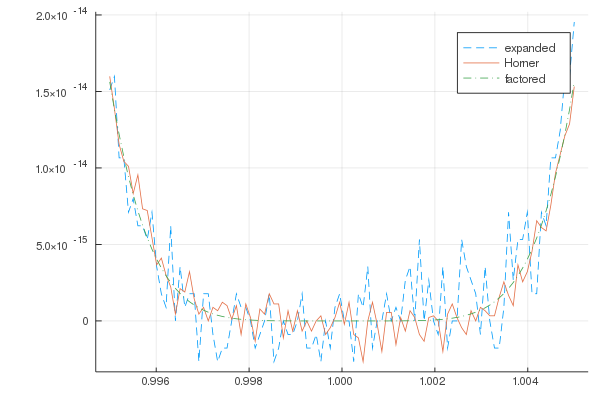

In [21]:
using Plots

xs = range(0.995, 1.005, length = 100)

# Expanded
p1(t) = t^6 - 6t^5 + 15t^4 - 20t^3 + 15t^2 - 6t + 1
plot(xs, p1.(xs), ls = :dash, label = "expanded")

# Horner
p2(t) = (((((t - 6) * t + 15) * t - 20) * t + 15) * t - 6) * t + 1
plot!(xs, p2.(xs), ls = :solid, label = "Horner")

# factored
p3(t) = (t - 1)^6
plot!(xs, p3.(xs), ls = :dashdot, label = "factored")

## 1.7 Computer Lab 1
**Example**. Find the smallest $x \in (1, 2)$ such that $x \otimes \frac{1}{x} \neq 1$.

In [22]:
for i in 1:1000000000
    x = nextfloat(1.0, i)
    y = 1/x
    if x * y != 1.0
        @printf("x = %0.17f\n", x)
        print_float_format(x)
        break
    end
end

x = 1.00000005722899710
-0-01111111111-0000000000000000000000001111010111001011111100101010-


**Example**. Evaluate $f(x, y) = 9x^4 - y^4 +2y^2$ for $(x, y) = (40545, 70226)$.

In [23]:
prob4(x, y) = 9x^4 - y^4 + 2y^2

x, y = 40545, 70226

for T in [Int64, Float16, Float32]
    println("f(x, y) = ", prob4(T(x), T(y)))
end

f(x, y) = 1
f(x, y) = NaN
f(x, y) = 9.863382e9


Correct answer is (3x^2 - x^2)(3x^y + x^2) + 2y^2 = -1 * 9863382151 + 9863382152 = 1

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*